## Task 3: Hand Gesture Recognition for playing music using CNN Image Classification method

### The main aim of this task is to classify the images based on hand gestures to play music. This idea was developed for the Automation students.

In [3]:
#importing the libraries for the ML model
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np

### Data loading and preprocessing

In [4]:
labels = ['start', 'stop','pause']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
#Now we can easily fetch our train and validation data.
train = get_data('dataset_gesture/train')
val = get_data('dataset_gesture/validation')

### Data Visualization

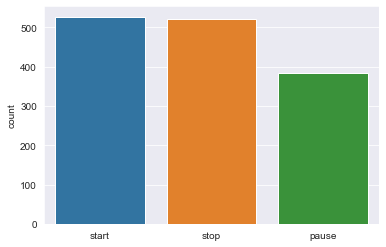

In [6]:
#visualize number of training images in each class
l = []
for i in train:
    if(i[1] == 0):
        l.append("start")
    elif(i[1] == 1):
        l.append("stop")
    else:
        l.append("pause")
sns.set_style('darkgrid')
sns.countplot(l)

In [7]:
train.shape

(1431, 2)

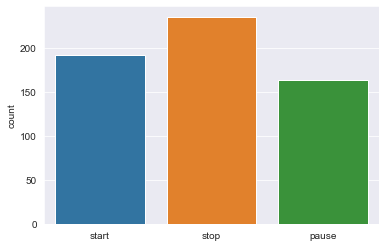

In [8]:
#visualize number of validation images in each class
l = []
for i in val:
    if(i[1] == 0):
        l.append("start")
    elif(i[1] == 1):
        l.append("stop")
    else:
        l.append("pause")
sns.set_style('darkgrid')
sns.countplot(l)

In [9]:
val.shape

(590, 2)

Text(0.5, 1.0, 'start')

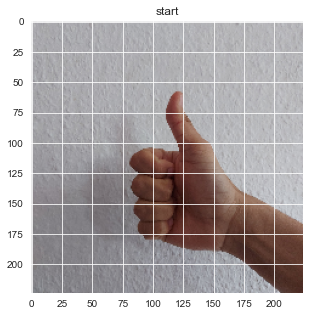

In [10]:
plt.figure(figsize = (5,5))
plt.imshow(train[3][0])
plt.title(labels[train[0][1]])

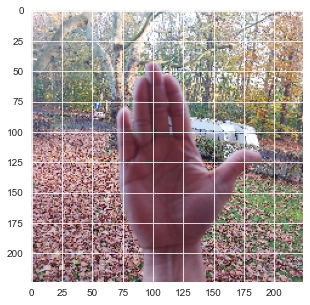

In [11]:
plt.figure(figsize = (5,5))
plt.imshow(train[900][0])
#plt.title(labels[train[1][1]])

Text(0.5, 1.0, 'pause')

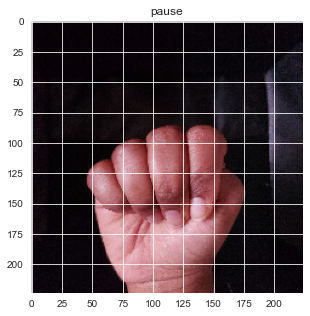

In [12]:
plt.figure(figsize = (5,5))
plt.imshow(train[-5][0])
plt.title(labels[train[-1][1]])

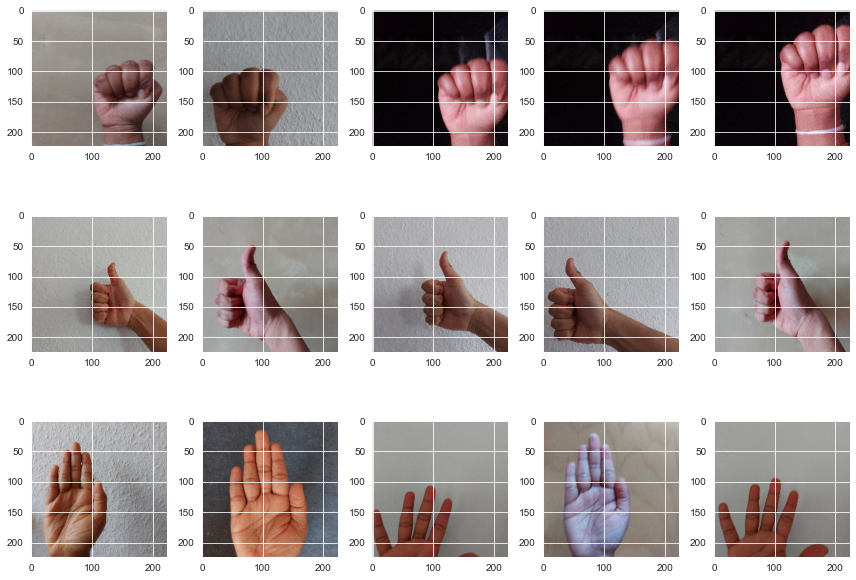

In [31]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 224

# input path for the images
base_path = "dataset_gesture/"

plt.figure(0, figsize=(12,20))
cpt = 0

for signal in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + signal + "/" +os.listdir(base_path + "train/" + signal)[i], target_size=(pic_size, pic_size))
        #img = img.rotate(270)
        plt.imshow(img)
plt.tight_layout()
plt.show()

In [14]:
## reshaping data for cnn model

x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

### Data Augmentation

In [15]:
datagen = ImageDataGenerator(
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True  # randomly flip images
        )  # randomly flip images


#datagen.fit(x_train)

### Model Building

In [16]:
model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0

### Model compilation

In [17]:
opt = Adam(lr=0.001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

### Model training

In [18]:
history = model.fit(datagen.flow(x_train,y_train,batch_size=32),steps_per_epoch=45, epochs = 50 , validation_data = (x_val, y_val))

Epoch 1/50
45/45 [==============================] - 919s 20s/step - loss: 1.0657 - accuracy: 0.4263 - val_loss: 1.0148 - val_accuracy: 0.5254 ETA: 27:01 - loss: 1.0743 - accuracy: 0.427 - ETA: 24:28 - loss: 1.1150 - accuracy: 0.390 - ETA: 22:42 - loss: 1.1260 - accuracy: 0.362 - ETA: 20:59 - loss: 1.1377 - accuracy: 0.354 - ETA: 20:20 - loss: 1.1691 - accuracy: 0.312 - ETA: 20:28 - loss: 1.1628 - accuracy: 0.316 - ETA: 19:39 - loss: 1.1643 - accuracy: 0.30 - ETA: 17:05 - loss: 1.1523 - accu
Epoch 2/50
45/45 [==============================] - 205s 5s/step - loss: 0.7978 - accuracy: 0.7491 - val_loss: 0.7336 - val_accuracy: 0.8136
Epoch 3/50
45/45 [==============================] - 125s 3s/step - loss: 0.7071 - accuracy: 0.8435 - val_loss: 0.6990 - val_accuracy: 0.8593
Epoch 4/50
45/45 [==============================] - 81s 2s/step - loss: 0.6604 - accuracy: 0.8952 - val_loss: 0.6889 - val_accuracy: 0.8644
Epoch 5/50
45/45 [==============================] - 87s 2s/step - loss: 0.6413 - a

### Model Evaluation

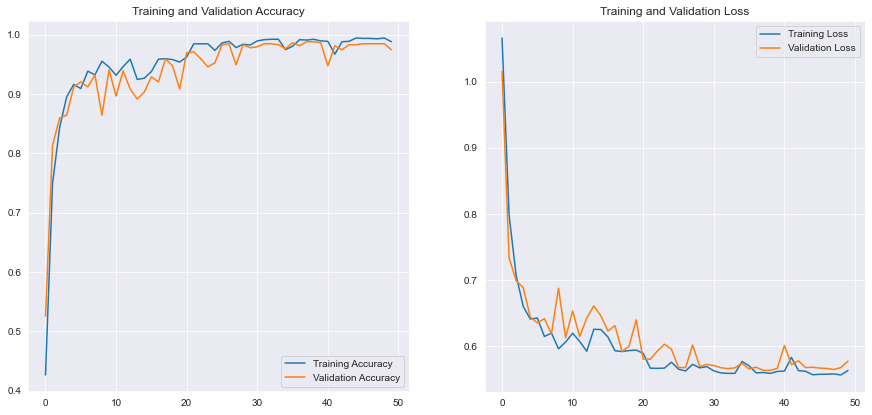

In [19]:
#plot the accuracy and the loss graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Classification report
4 ways to check if the predictions are right:
TN / True Negative: the case was negative and predicted negative
TP / True Positive: the case was positive and predicted positive
FN / False Negative: the case was positive but predicted negative
FP / False Positive: the case was negative but predicted positive

In [20]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['start (Class 0)','stop (Class 1)','pause (Class 2)']))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
                 precision    recall  f1-score   support

start (Class 0)       0.98      1.00      0.99       192
 stop (Class 1)       1.00      0.94      0.97       235
pause (Class 2)       0.94      0.99      0.96       163

       accuracy                           0.97       590
      macro avg       0.97      0.98      0.97       590
   weighted avg       0.98      0.97      0.97       590



Precision:- Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall:- Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

F1 score — What percent of positive predictions were correct?
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [21]:
model.save('multi_model.h5') #save the model 

## Prediction results

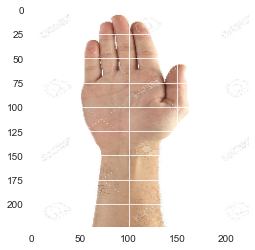

[1]
the predicted image is stop


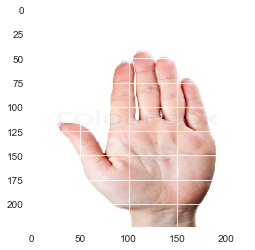

[1]
the predicted image is stop


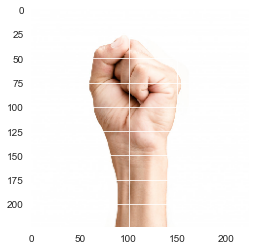

[1]
the predicted image is stop


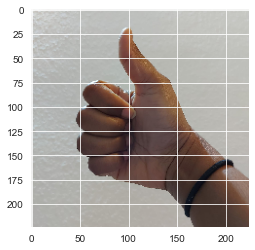

[0]
the predicted image is start


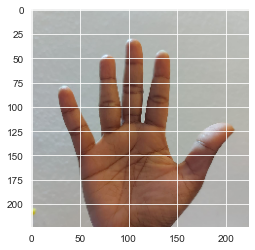

[1]
the predicted image is stop


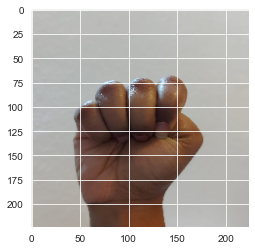

[2]
the predicted image is pause


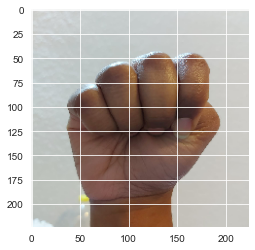

[2]
the predicted image is pause


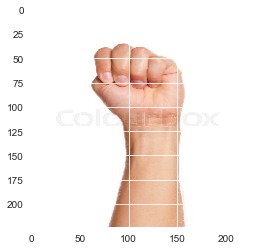

[2]
the predicted image is pause


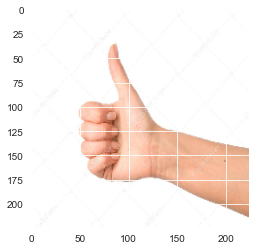

[0]
the predicted image is start


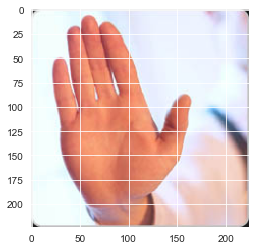

[1]
the predicted image is stop


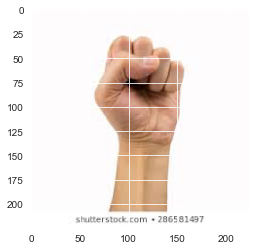

[2]
the predicted image is pause


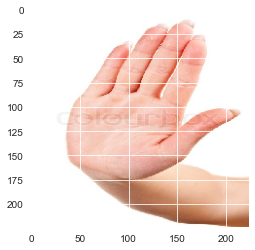

[1]
the predicted image is stop


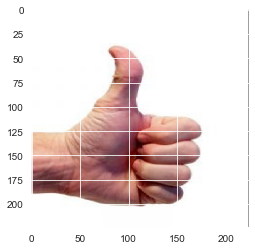

[1]
the predicted image is stop


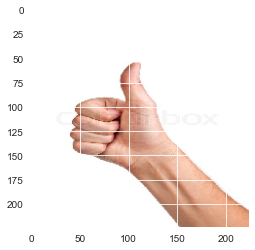

[0]
the predicted image is start


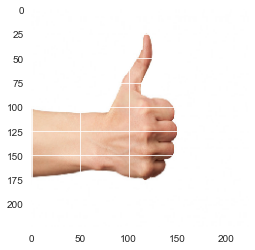

[0]
the predicted image is start


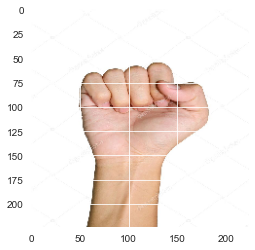

[2]
the predicted image is pause


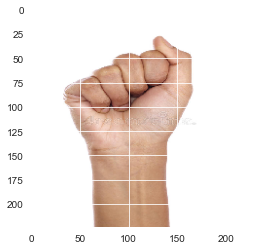

[2]
the predicted image is pause


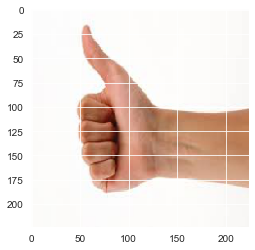

[1]
the predicted image is stop


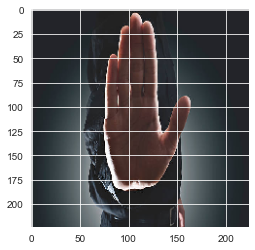

[1]
the predicted image is stop


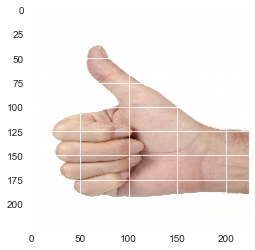

[0]
the predicted image is start


In [33]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

# image folder
folder_path = 'dataset_gestures_file/predict/'
# path to model
model_path = 'multi_model.h5'
# dimensions of images
img_width, img_height = 224, 224

# load the trained model
model = load_model(model_path)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(img, axis=0)
    #images.append(img)

# stack up images list to pass for prediction
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    print(classes)
    a = classes
    if a == 0:
        print("the predicted image is start")
    elif a == 1:
        print("the predicted image is stop")
    elif a == 2:
        print("the predicted image is pause")

### The CNN model acieves a greater accuracy in this task. The prediction done on the new set of images proves that the model built holds good in this case.